1D график электростатического потенциала для нескольких значений y (слоев поры по ее длине: например, срез в центре поры, 25% от края и край). Видно, что пора симметрична, потому что если брать долю 0.2 справа или слева: кривые накладываются

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.stats import linregress

sys.path.append('/home/tpopova/prj/PB_SCF/08_2D_pore/py_files')
sys.path.append('/home/tpopova/prj/PB_SCF/01_dendrone_pore/py_files')

import config_loader
from out_reader import out_reader, get_profiles_by_y_or_x
from dendrons_pore import dendrons_pore
from math import floor

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml


Параметры щетки

In [2]:
N = 30
Cs = 0.008
S = 50
D = 15
valence = -0.5

# Для 2D
L_pore = 30
space = 10
L_wall = 5

# Namics 2D

In [3]:
# Загрузить конфигурацию
config = config_loader.load_config()

# Обновить параметры
params_to_update = {
    "Cs": Cs,
    "D": D,
    "L_pore": L_pore,
    "L_wall": L_wall,
    "N": N,
    "S": S,
    "chi_solv": 0.5,
    "chi_surf": -0.55,
    "max_val": 0.1,
    "min_val": 0.1,
    "output_dir": "2D_pore_in_files_fig_1",
    "range_param": 'Cs',
    "space": space,
    "target_dir": "/home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates",
    "valence": valence,
}

for param, value in params_to_update.items():
    config = config_loader.update_config_param(config, param, value)

# Сохранить обновлённую конфигурацию
config_loader.save_config(config)

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.008
INFO:root:Обновление параметра D на 15
INFO:root:Обновление параметра L_pore на 30
INFO:root:Обновление параметра L_wall на 5
INFO:root:Обновление параметра N на 30
INFO:root:Обновление параметра S на 50
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на -0.55
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_fig_1
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 10
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml


# Расчет профилей

In [4]:
df, x, y, psi, phi_brush, phi_end_brush = out_reader()

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Файл 2D_Cs_0_0080_L30_0_L_wall_5_0_space_10_0_v_-0_50_D_15_N_30_theta_56_55.in успешно создан в 2D_pore_in_files_fig_1


Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.417004e+00 |g| = 2.740560e+00 alpha = 1.000000e+00 
hessian scaling: 0.254383
it =  1  E = 1.327559e+00 |g| = 2.646048e+00 alpha = 1.364889e-01 
it =  2  E = 2.668475e+00 |g| = 2.578205e+00 alpha = 3.037329e-02 
it =  3  E = 3.098308e+00 |g| = 2.535320e+00 alpha = 2.060759e-02 
it =  4  E = 3.706307e+00 |g| = 2.509150e+00 alpha = 1.331825e-02 
it =  5  E = 4.319425e+00 |g| = 2.489378e+00 alpha = 9.118668e-03 
it =  6  E = 4.740743e+00 |g| = 2.474050e+00 alpha = 7.073730e-03 
it =  7  E = 5.000007e+00 |g| = 2.459964e+00 alpha = 5.962074e-03 
it =  8  E = 5.100793e+00 |g| = 2.447574e+00 alpha = 5.389949e-03 
it =  9  E = 5.146012e+00 |g| = 2.435460e+00 alpha = 4.995950e-03 
it =  10  E = 5.121623e+00 |g| = 2.424313e+0

# График элекстростатического потенциала

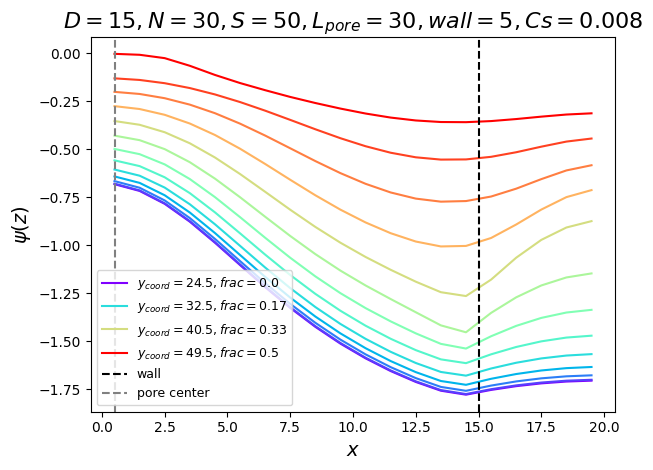

In [18]:
# Пример данных
y_fraction = np.linspace(0, 0.5, num=13).tolist()

# Задание цветов
colors = plt.cm.rainbow(np.linspace(0, 1, len(y_fraction)))

# Используем функцию для получения значений по доле
result = get_profiles_by_y_or_x(df, y_fraction, profiles_name='sys_noname_psi', groupby='y', coord='x', use_fraction=True)

# Построение графиков с соответствующими стилями и цветами
for idx, (y_val, data) in enumerate(result.items()):
    color = colors[idx]
    frac = y_fraction[idx]

    # Добавляем метку в легенду только для каждого третьего значения
    if idx % 4 == 0:
        label = f"$y_{{coord}} = {y_val}, frac = {round(frac, 2)}$"
    else:
        label = None  # Не добавляем метку для остальных

    plt.plot(data['x'], data['sys_noname_psi'], label=label, color=color)

plt.axvline(x=D, color='black', linestyle='--', label=f"wall")
plt.axvline(x=0.5, color='gray', linestyle='--', label=f"pore center")

# Настройка графика
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$\\psi(z)$", fontsize=14)
plt.title(f"$D = {D}, N = {N}, S = {S}, L_{{pore}} = {L_pore}, wall = {L_wall}, Cs = {Cs}$", fontsize=16)
plt.legend(fontsize=9, loc = 'lower left')
plt.grid(False)  # Убираем сетку
plt.tight_layout()

# Отображение графика
plt.show()


# Электростатический потенциал: от r^2

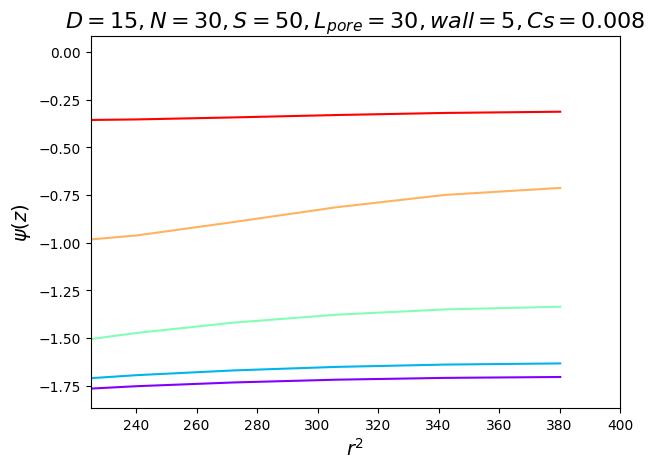

In [42]:
# Пример данных
y_fraction = np.linspace(0, 0.5, num=5).tolist()

# Задание цветов
colors = plt.cm.rainbow(np.linspace(0, 1, len(y_fraction)))

# Используем функцию для получения значений по доле
result = get_profiles_by_y_or_x(df, y_fraction, profiles_name='sys_noname_psi', groupby='y', coord='x', use_fraction=True)

# Построение графиков с соответствующими стилями и цветами
for idx, (y_val, data) in enumerate(result.items()):
    color = colors[idx]
    frac = y_fraction[idx]

    # Добавляем метку в легенду только для каждого третьего значения
    if idx % 4 == 0:
        label = f"$y_{{coord}} = {y_val}, frac = {round(frac, 2)}$"
    else:
        label = None  # Не добавляем метку для остальных

    plt.plot(data['x']**2, data['sys_noname_psi'], label=label, color=color)

# plt.axvline(x=D**2, color='black', linestyle='--', label=f"wall")
# plt.axvline(x=0.5**2, color='gray', linestyle='--', label=f"pore center")

# Настройка графика
plt.xlabel("$r^2$", fontsize=14)
plt.ylabel("$\\psi(z)$", fontsize=14)
plt.title(f"$D = {D}, N = {N}, S = {S}, L_{{pore}} = {L_pore}, wall = {L_wall}, Cs = {Cs}$", fontsize=16)
# plt.legend(fontsize=9, loc = 'lower left')
plt.grid(False)  # Убираем сетку
plt.tight_layout()
plt.xlim(D**2, (D + L_wall)**2)

# Отображение графика
plt.show()


# Линейная регрессия для проверки прямых 

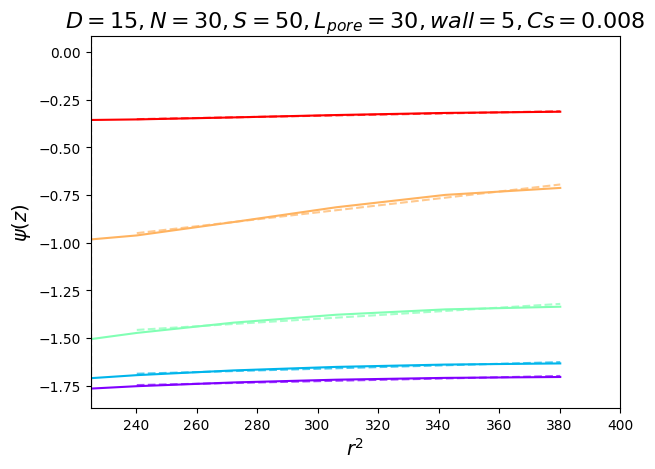

In [43]:
from_ = D
to = D + L_wall

# Пример данных
y_fraction = np.linspace(0, 0.5, num=5).tolist()
colors = plt.cm.rainbow(np.linspace(0, 1, len(y_fraction)))

# Получение данных
result = get_profiles_by_y_or_x(df, y_fraction, profiles_name='sys_noname_psi', groupby='y', coord='x', use_fraction=True)

# Построение графиков с прямыми
for idx, (y_val, data) in enumerate(result.items()):
    color = colors[idx]
    frac = y_fraction[idx]
    x_squared = data['x']**2  # Преобразование x в квадрат
    psi = data['sys_noname_psi']
    
    # Фильтрация данных в диапазоне [10, D^2]
    mask = (x_squared >= from_**2) & (x_squared <= to**2)
    x_filtered = x_squared[mask]
    psi_filtered = psi[mask]

    # Линейная регрессия на выбранном диапазоне
    if len(x_filtered) > 1:  # Чтобы избежать ошибки регрессии
        slope, intercept, _, _, _ = linregress(x_filtered, psi_filtered)
        linear_fit = slope * x_filtered + intercept  # Прямая линия

        # Добавление линейной регрессии на график
        plt.plot(x_filtered, linear_fit, linestyle='--', color=color, alpha=0.7)

    # Построение основной линии
    if idx % 4 == 0:
        label = f"$y_{{coord}} = {y_val}, frac = {round(frac, 2)}$"
    else:
        label = None
    plt.plot(x_squared, psi, label=label, color=color)

# Вертикальные линии
plt.axvline(x=D**2, color='black', linestyle='--', label="wall")
plt.axvline(x=0.5**2, color='gray', linestyle='--', label="pore center")

# Настройка графика
plt.xlabel("$r^2$", fontsize=14)
plt.ylabel("$\\psi(z)$", fontsize=14)
plt.title(f"$D = {D}, N = {N}, S = {S}, L_{{pore}} = {L_pore}, wall = {L_wall}, Cs = {Cs}$", fontsize=16)
plt.grid(False)
plt.tight_layout()
plt.xlim(from_**2, to**2)
# plt.legend(fontsize=9, loc='lower left')

# Отображение графика
plt.show()
